In [4]:
#lets first import all the necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
# !pip install matplotlib
# !pip install seaborn



In [6]:
#here we have to make a classification model for the target categories of iris dataset 
#on the basis of their 

In [7]:
df=pd.read_csv('IRIS.csv')

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Here, we have 4 input columns and target is categorical column

1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#here we have 150 unique columns
df.isnull().sum()
#their is no null values present in the dataset 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

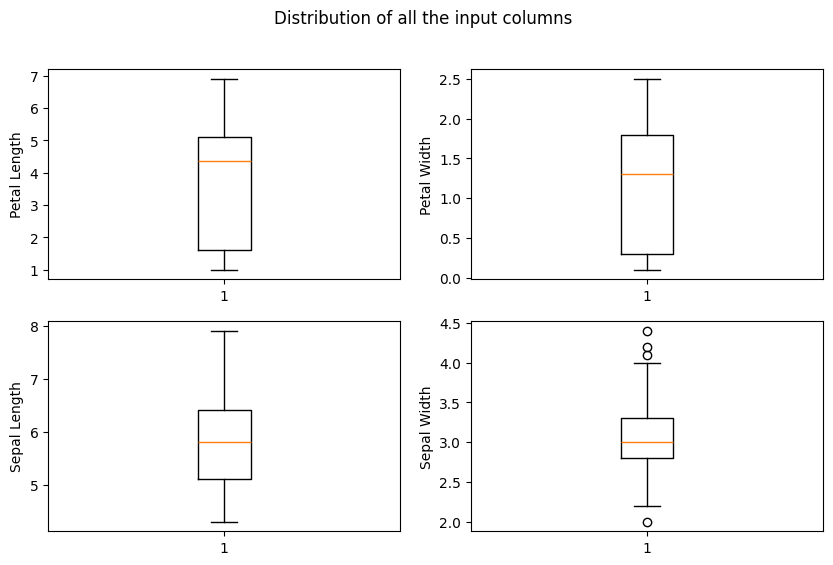

In [12]:
#we don't required to do the null handling 
#lets plot the input columns for the outlier detection in the dataset 
# plt.figure(figsize=(10,6))
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,6)) 
#lets create the boxplot of the 4 columns
fig.suptitle('Distribution of all the input columns')
ax1.boxplot(df['petal_length'])
ax1.set_ylabel('Petal Length')
ax2.boxplot(df['petal_width'])
ax2.set_ylabel('Petal Width')
ax3.boxplot(df['sepal_length'])
ax3.set_ylabel('Sepal Length')
ax4.boxplot(df['sepal_width'])
ax4.set_ylabel('Sepal Width')
plt.show()

In [13]:
#here we can see that their is outlier in only Sepal width column
#let detect and remove the outliers from this columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3> What are outliers ? </h3>
<h5> Outliers are those data points whose behaviour is completely different from all the other datapoints present
in the columns. Outliers can affect the model performance so, to the optimized performance,it is recommended to 
remove the outliers from the dataset before the training of the model.
But they are not necessarily always bad data sometime they are useful in cases like fraud detection,etc.
</h5>


<h3> Outlier Detection and Handling </h3>
<h5> There are following methods to handle the outliers in the dataset </h5>
<h5> 1. By removing - if quantity of outliers is (2 to 3)% </h5>
  <h5> 2. By imputing central tendency </h5>
<h5>  3. By transformation  </h5>
<h5> 4. Winsorization- using the IQR range </h5> 
<h5> 5. By normalization </h5>

In [14]:
import inspect
print(inspect.signature(plt.hist))             

(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, *, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'


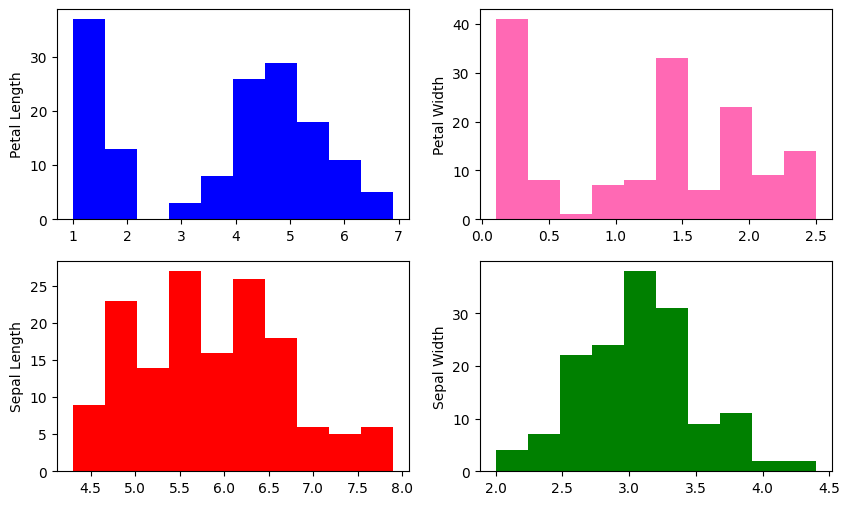

In [15]:
#lets see the distribution of all the input columns 
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,6))
ax1.hist(df['petal_length'],color='blue')
ax2.hist(df['petal_width'],color='hotpink')
ax3.hist(df['sepal_length'],color='red')
ax4.hist(df['sepal_width'],color='green')

ax1.set_ylabel('Petal Length')
ax2.set_ylabel('Petal Width')

ax3.set_ylabel('Sepal Length')
ax4.set_ylabel('Sepal Width')
plt.show()



In [16]:

#lets here apply the normalization technique 
mean=df['sepal_width'].mean()
std=df['sepal_width'].std()
max=mean+3*std 
min=mean-3*std 

#filling the outlier with the maximum and minimum value in the df['sepal_width']
df['sepal_width']=np.where(df['sepal_width']>max,max,np.where(df['sepal_width']<min,min,df['sepal_width']))

print(max,min)


4.354782934086521 1.7532170659134791


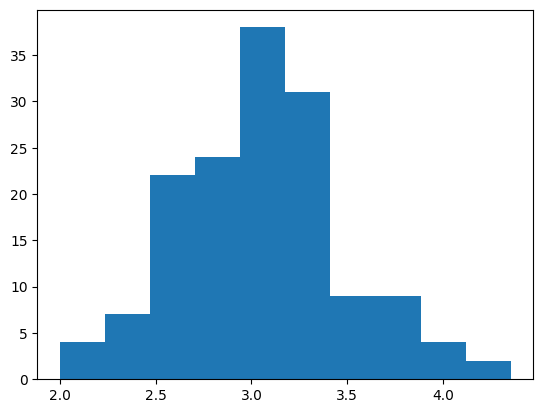

In [17]:
#after capping the outliers lets see the boxplot 
# plt.boxplot(df['sepal_width'])
plt.hist(df['sepal_width'])
#as we can see that the sepal_width look's like normalized but it is not normalized 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23ec6931640>,
 'caps': [<matplotlib.lines.Line2D at 0x23ec687da60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ec69330b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ec6175af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ec6798800>],
 'means': []}

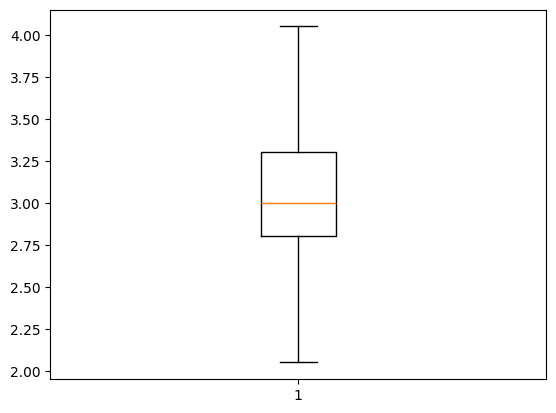

In [18]:
#lets also do the winsorization 
q1=df['sepal_width'].quantile(0.25)
# q2=df['sepal_width'].quantile(0.5)
q3=df['sepal_width'].quantile(0.75)

#lets applly the outlier handling 
iqr=q3-q1
# print(q1,q2,q3 ,iqr)
up=q3+(1.5*iqr)
down=q1-(1.5*iqr) 
df['sepal_width']=np.where(df['sepal_width']>up,up,np.where(df['sepal_width']<down,down,df['sepal_width']))
plt.boxplot(df['sepal_width'])
#and we can see all the outliers are removed 


(array([ 4.,  7., 13., 23., 36., 25., 18.,  9.,  9.,  6.]),
 array([2.05, 2.25, 2.45, 2.65, 2.85, 3.05, 3.25, 3.45, 3.65, 3.85, 4.05]),
 <BarContainer object of 10 artists>)

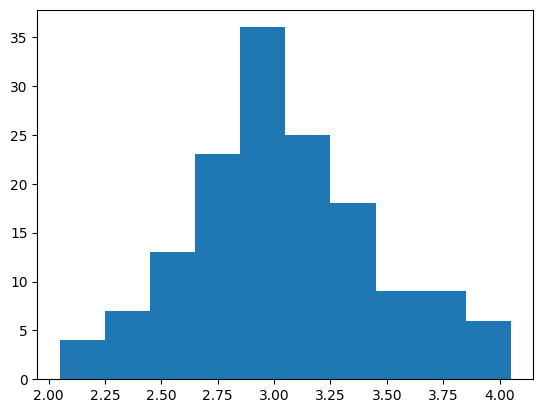

In [19]:
plt.hist(df['sepal_width'])

In [20]:


#lets apply the algorithm on this to train the model for the classification of iris flower classes 
df['species'].value_counts()
#3 balanced classes 

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#lets split the data 
from sklearn.model_selection import train_test_split 

#lets divide the data into the x and y 
x=df.iloc[:,0:4]
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [23]:
#lets apply the algorithm 
# DECISION TREE 
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train) 

DecisionTreeClassifier()

In [24]:
#lets take the prediction from our model 
#here if the target column is string then their is no issue
result=dt.predict([[5.1,3.5,1.4,0.2]])  #trained model always required a 2d array
print(result)

['Iris-setosa']


c:\Users\aashi\Envs\lang_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
#lets see the score
dt.score(x_test,y_test) #our model is over fitted 


1.0

In [26]:
#lets apply the knn on our data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [27]:
#lets take the prediction 
knn.score(x_test,y_test) # at k==9 the accuracy become at 100 percent 

1.0

In [28]:
#let apply the cross validation on the both model and see which is performing well 
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True)
scores=cross_val_score(knn,x,y,cv=kf) #knn
print(scores)
print('mean',scores.mean())

[1.         0.86666667 1.         1.         1.         1.
 0.93333333 1.         1.         0.93333333]
mean 0.9733333333333334


In [29]:
scores=cross_val_score(dt,x,y,cv=kf) #decision tree
print(scores.mean())

0.9466666666666667


In [30]:
#here our knn is performing well 


In [31]:
#lets see the classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
y_pred=knn.predict(x_test)
print('recall is ',recall_score(y_test,y_pred,average='macro'))
print('precision is ',precision_score(y_test,y_pred,average='macro'))
print('f1_score is ',f1_score(y_test,y_pred,average='macro'))
print('confusion matrix is as follows: \n',confusion_matrix(y_test,y_pred))
#all the output 100 percent as we know our model is overfitting 


recall is  1.0
precision is  1.0
f1_score is  1.0
confusion matrix is as follows: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [32]:
#lets see the classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
y_pred=dt.predict(x_test)
print('recall is ',recall_score(y_test,y_pred,average='macro'))
print('precision is ',precision_score(y_test,y_pred,average='macro'))
print('f1_score is ',f1_score(y_test,y_pred,average='macro'))
print('confusion matrix is as follows: \n',confusion_matrix(y_test,y_pred))
#all the output 100 percent as we know our model is overfitting 


recall is  1.0
precision is  1.0
f1_score is  1.0
confusion matrix is as follows: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [33]:
#lets try the ensemble learning 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=25)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25)

In [34]:
#lets see its score 
rf.score(x_test,y_test) #here it is also giving the 100% accuracy lets apply the cross validation for checking
#that our model is working similar on unseen data 

from sklearn.model_selection import KFold,cross_val_score 
k=KFold(n_splits=10,shuffle=True)
scores=cross_val_score(rf,x,y,cv=k)
print(scores.mean())
#here we are also getting accuracy similar to the knn 
#so thiswork is done 


0.9533333333333334


In [35]:
#NOTE: FURTHER FOR REDUCING THE OVERFITTING WE REQUIRE MORE DATA 
#THAT WE CAN GENERATE USING DATA AUGMENTATION 

# Thank You !!
